In [ ]:
!unzip '/content/VEEM VR 데이터.zip'

# **"하단은 eyerpt data 변수 전처리 과정입니다."**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as patches

import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm 

#0. 패널 이미지 사이즈 조정



In [ ]:
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

img = Image.open('/content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 패널 이미지/Panel1_forROI.png')
img_small = img.resize((566, 921))
img_small.save('/content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 패널 이미지/Panel1_resize.png')

In [ ]:
panel1_button_info = {'x': [-0.2047,-0.022,0.02,0.2047], 'y': [1.477,1.124]}
panel2_button_info = {'x': [-0.2512, -0.1445, -0.119, -0.013, 0.012, 0.0525, 0.119, 0.142, 0.247, 0.2635], 'y': [1.82979, 1.715, 1.605, 1.486, 1.478, 1.3613]}
panel3_button_info = {'x': [-0.25, 0.1445, -0.1189, -0.012, 0.0118, 0.0525, 0.119, 0.1431, 0.2635], 'y': [1.82979, 1.715, 1.484, 1.366, 1.3575, 1.24029]}
panel4_button_info = {'x': [-0.2512, -0.1445, -0.119, -0.013, 0.012, 0.0525, 0.119, 0.142, 0.247, 0.2635], 'y': [1.82979, 1.715, 1.353, 1.235, 1.225, 1.107]}
panel5_button_info = {'x': [-0.202, -0.0232, 0.0225, 0.0525, 0.2, 0.2635], 'y': [1.82979, 1.715, 1.385, 1.136]}
panel6_button_info = {'x': [-0.2025, -0.098, -0.0525, 0.0525, 0.0525, 0.098, 0.2025, 0.2635], 'y': [1.82979, 1.715, 1.684, 1.5888, 1.56936, 1.4740403, 1.4542, 1.35785, 1.340, 1.2449]}
panel_button_info = [panel1_button_info, panel2_button_info, panel3_button_info, panel4_button_info, panel5_button_info, panel6_button_info]
#print(panel1_button_info['x'][0])
arr = list(panel1_button_info.keys())
panel_info = {'1': ["instore","takeout"], '2': ["ham1","ham2","ham3","ham4","ham5","ham6","ham7","ham8","back"],'3':["side1","side2","side3","side4","side5","side6","side7","side8","back"],'4':["bev1","bev2","bev3","bev4","bev5","bev6","bev7","bev8","back"],'5':["card","mobile","back"],'6':["n1","n2","n3","n4","n5","n6","n7","n8","n9","delete","n0","ok","back"]}

#1. 단계별로 걸린 시간 구하기

In [ ]:
from decimal import Decimal

def Panel_Time(csv_path):
    csv_test = pd.read_csv(csv_path)
    x = csv_test.loc[:,'Panel_X']
    x = x.to_numpy()
    step = csv_test.loc[:, 'Panel_num']

    panel_img_num = list(panel_info.keys())
        
    for j in panel_img_num:

        num = int(j)

        if num == 1:
            data_indecis = np.where(step==num)
            data_1 = x[data_indecis]
        if num == 2:
            data_indecis = np.where(step==num)
            data_2 = x[data_indecis]
        if num == 3:
            data_indecis = np.where(step==num)
            data_3 = x[data_indecis]
        if num == 4:
            data_indecis = np.where(step==num)
            data_4 = x[data_indecis]
        if num == 5:
            data_indecis = np.where(step==num)
            data_5 = x[data_indecis]
        #6단계는 panle_num = 7
        if num == 6:
            data_indecis = np.where(step==num+1)
            data_6 = x[data_indecis]

    time_list = []
    time_1 = float(Decimal(str(len(data_1)))*Decimal('0.1'))
    time_2 = float(Decimal(str(len(data_2)))*Decimal('0.1'))
    time_3 = float(Decimal(str(len(data_3)))*Decimal('0.1'))
    time_4 = float(Decimal(str(len(data_4)))*Decimal('0.1'))
    time_5 = float(Decimal(str(len(data_5)))*Decimal('0.1'))
    time_6 = float(Decimal(str(len(data_6)))*Decimal('0.1'))
    total_time = float(Decimal(str(time_1 + time_2 + time_3 + time_4 + time_5 + time_6)))
    time_list.append(time_1)
    time_list.append(time_2)
    time_list.append(time_3)
    time_list.append(time_4)
    time_list.append(time_5)
    time_list.append(time_6)
    time_list.append(total_time)
    return time_list

In [ ]:

path = '/content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/'
file_path = os.listdir(path)
file_path_list = [path + file for file in file_path if file.endswith('eyerpt.csv')]
file_path_list.sort()
print(file_path_list)
time_lists = []

for i in range(len(file_path_list)-1):
    time_list = Panel_Time(file_path_list[i])
    time_lists.append(time_list)

print(time_lists)

['/content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/02_eyerpt.csv', '/content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/03_eyerpt.csv', '/content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/04_eyerpt.csv', '/content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/06_eyerpt.csv', '/content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/07_eyerpt.csv', '/content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/08_eyerpt.csv', '/content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/09_eyerpt.csv', '/content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/10_eyerpt.csv',

#2. 산점도 그리기 (키오스크 화면 밖 나간 점 시각적으로 확인하기 위함.)

In [ ]:
def scatter_plot (csv_path):
    csv_test = pd.read_csv(csv_path)

    x = csv_test.loc[:,'Panel_X']
    y = csv_test.loc[:,'Panel_Y']
    x = np.array(x)
    y = np.array(y)
    x_out = []
    y_out = []

    fig, ax = plt.subplots(figsize=(7, 7))

    plt.scatter(x, y)
    plt.xlim([-3.1, 2])     
    plt.ylim([0.5, 2])
    ax.add_patch(
    patches.Rectangle(
        (-0.283,0.978),      # (x, y) coordinates of left-bottom corner point
        0.566, 0.921,            # width, height
        edgecolor = 'red',
        linestyle = 'dashed',
        fill = False 
    ))
    plt.legend()     
    plt.show()

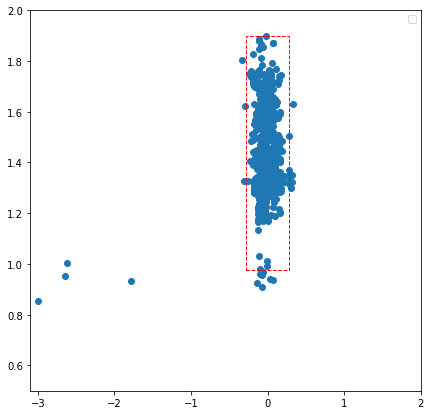

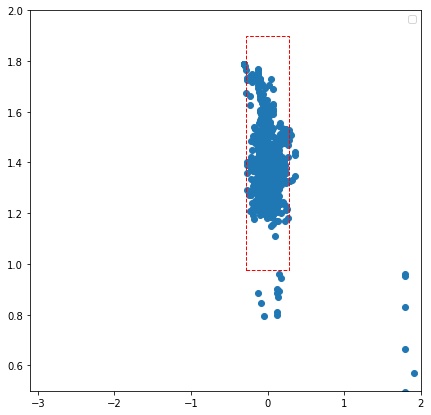

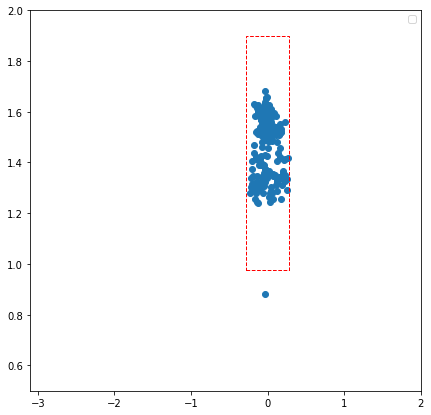

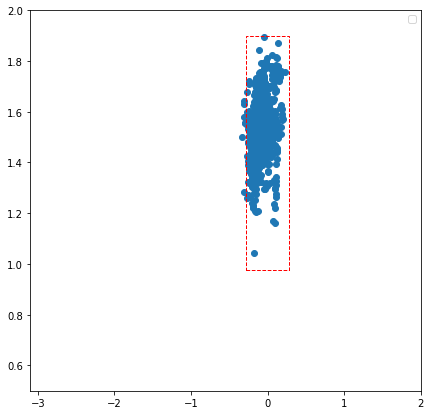

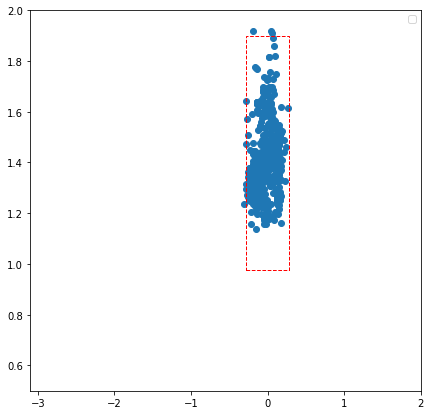

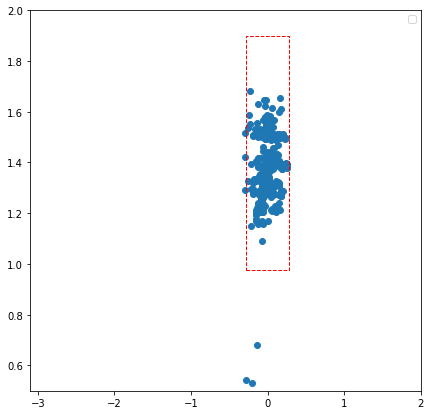

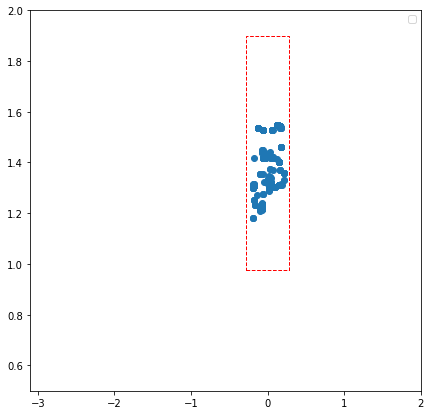

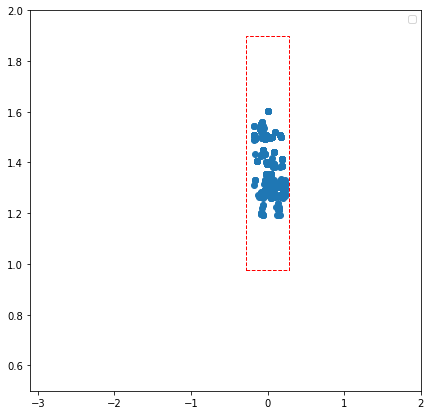

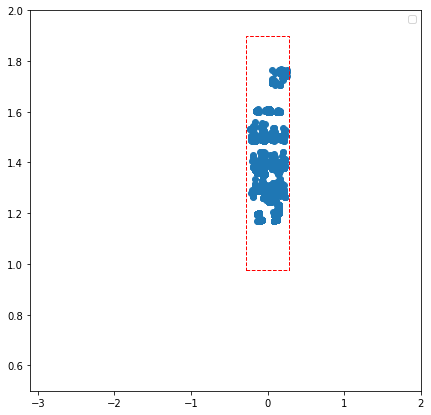

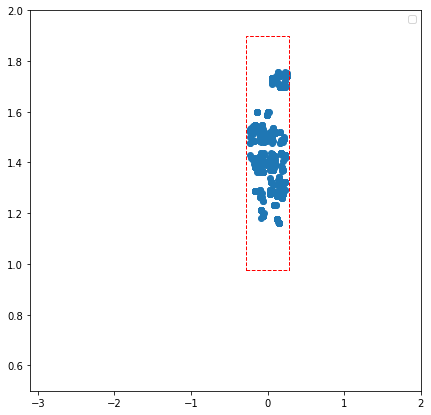

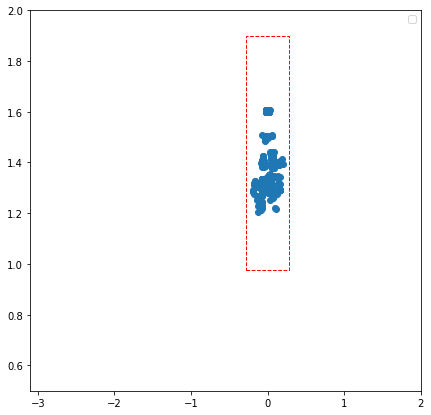

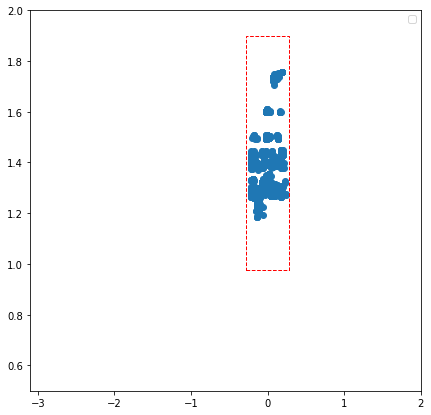

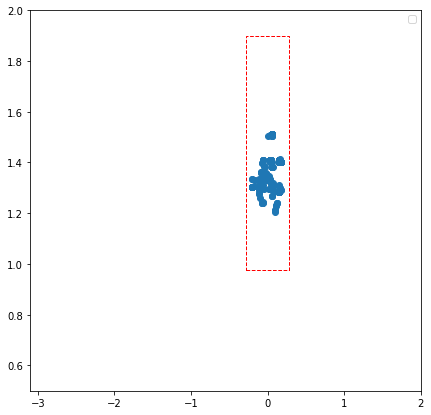

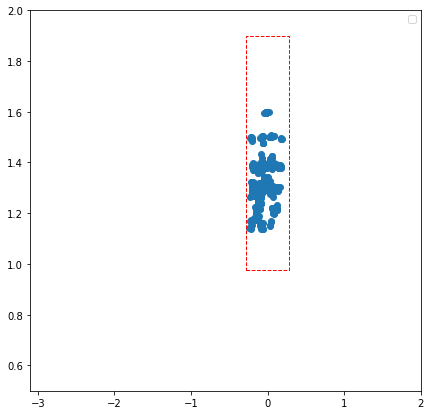

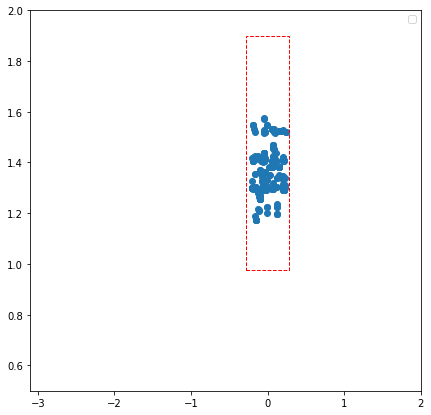

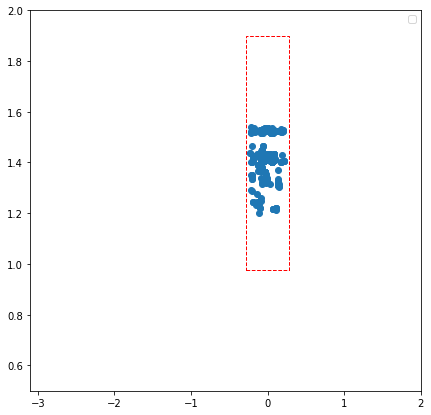

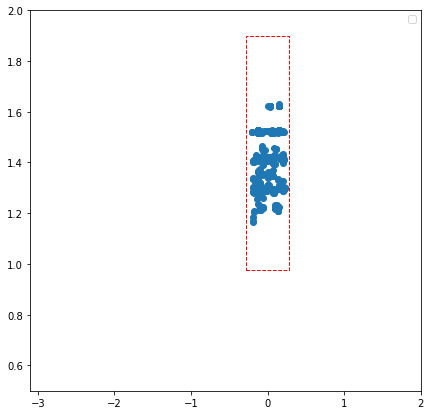

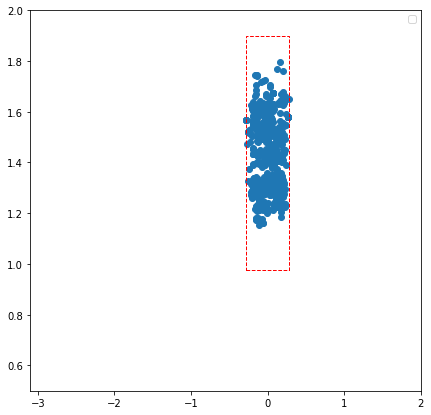

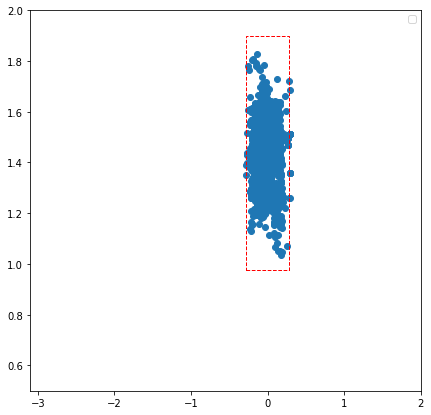

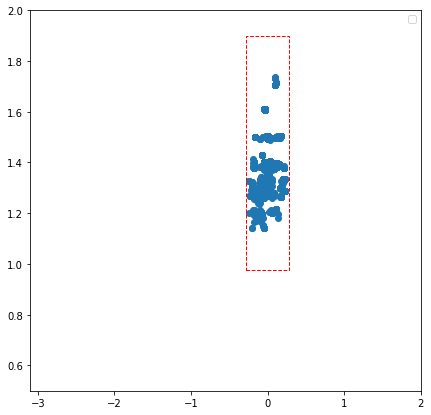

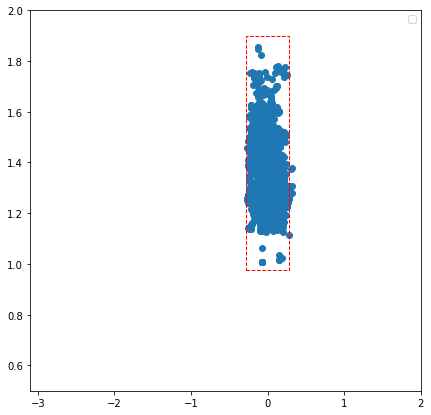

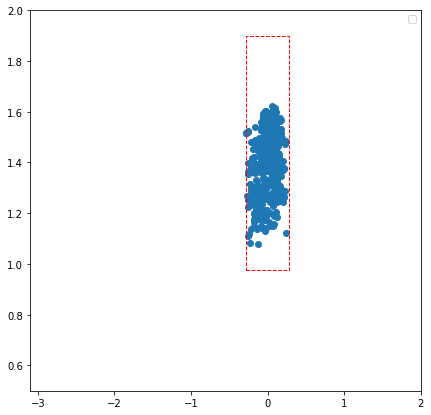

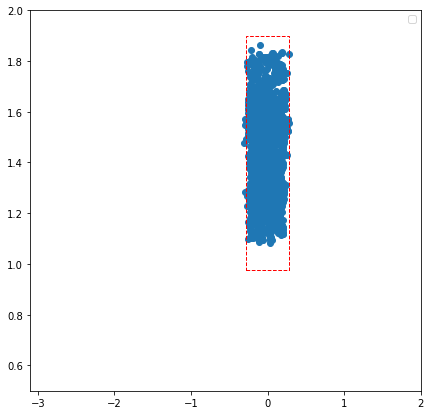

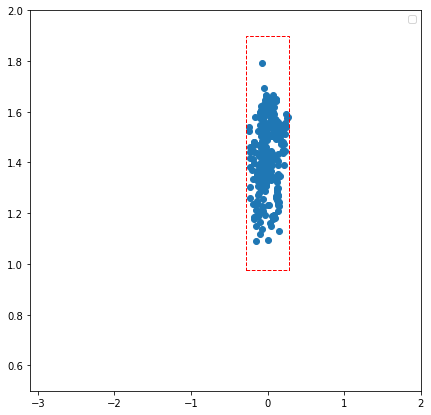

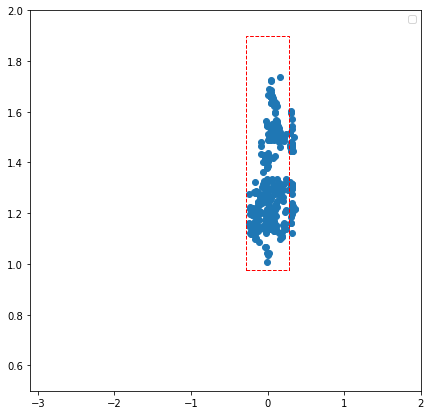

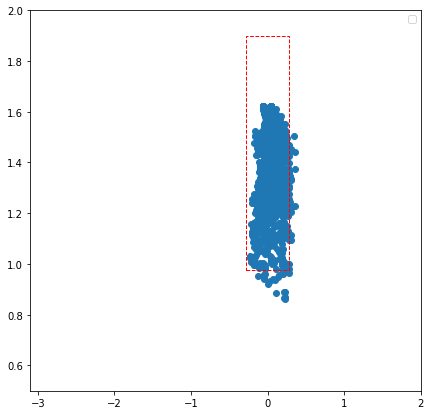

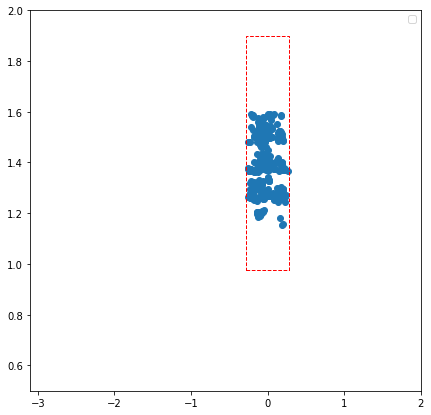

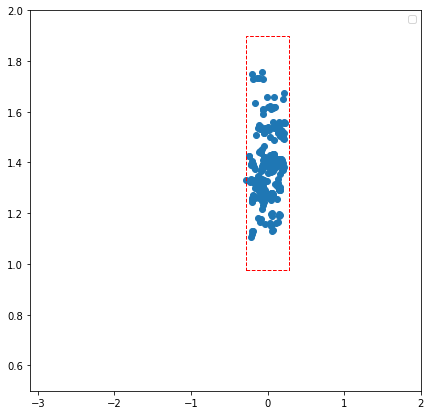

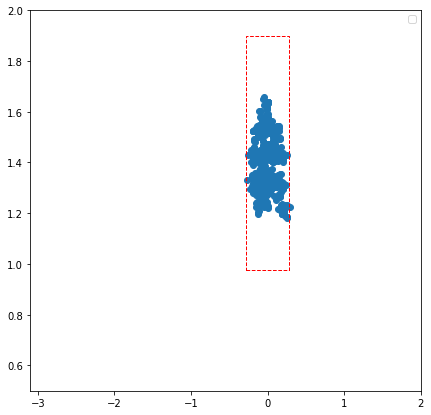

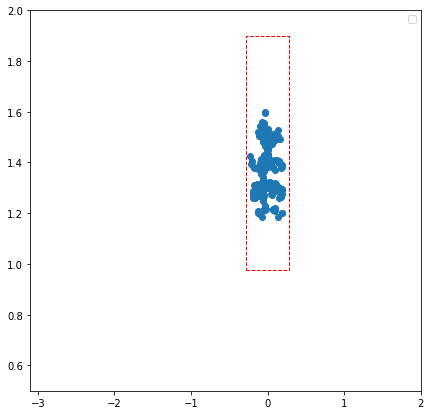

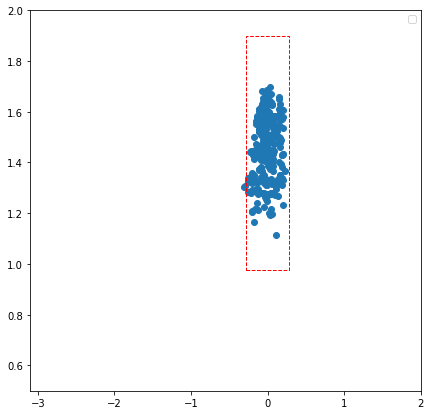

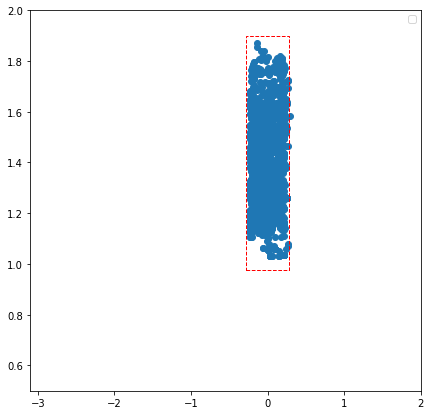

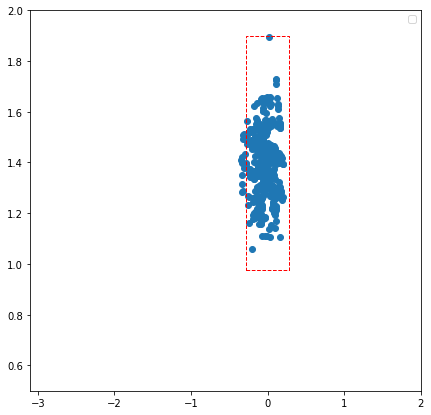

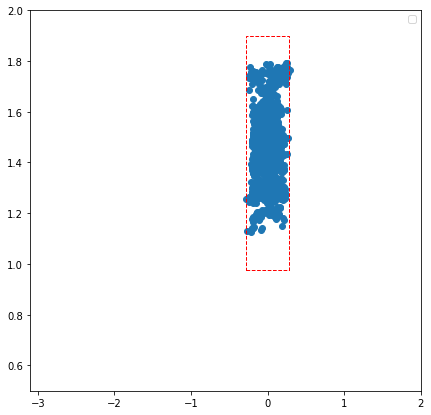

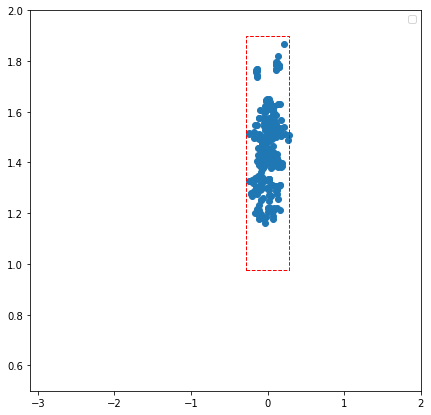

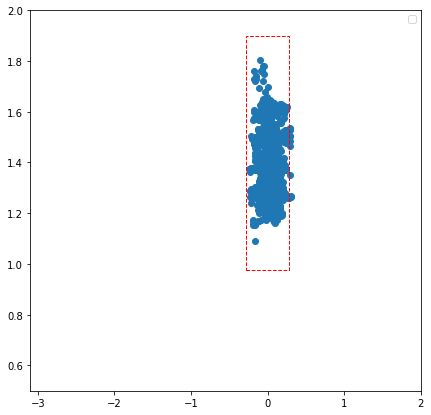

In [ ]:
path = '//content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/'
file_path = os.listdir(path)
file_path_list = [path + file for file in file_path if file.endswith('eyerpt.csv')]
file_path_list.sort()

for i in range(len(file_path_list)-1):
    scatter_plot (file_path_list[i])

#3. 키오스크 화면 밖으로 나간 점 개수 계산(이상치 계산)

In [ ]:
def outlier_num (csv_path):
    csv_test = pd.read_csv(csv_path)

    x = csv_test.loc[:,'Panel_X']
    y = csv_test.loc[:,'Panel_Y']
    
    x = x.to_numpy()
    y = y.to_numpy()

    out_num = 0
    for i in range(len(x)):
            if -0.283>=x[i] or 0.283<=x[i]:
                out_num += 1
            elif 0.978>=y[i] or 1.899<=y[i]:
                out_num += 1
    return out_num

In [ ]:
path = '/content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/'
file_path = os.listdir(path)
file_path_list = [path + file for file in file_path if file.endswith('eyerpt.csv')]
file_path_list.sort()
#print(file_path_list)

out_num_list = []
for i in range(len(file_path_list)-1):
    out_num = outlier_num(file_path_list[i])
    out_num_list.append(out_num)

print(out_num_list)

[27, 56, 1, 9, 5, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 7, 0, 5, 0, 70, 46, 0, 0, 1, 0, 2, 1, 13, 1, 1, 13]


#4. 목표 패널 외의 패널을 바라본 이상치 비율 계산 (모두 걸린 시간이 다르므로 비율로 계산)

In [ ]:
#목표 패널 좌표 중간값 구하기
target_panel1_med = [round((panel1_button_info['x'][0]+panel1_button_info['x'][1])/2,4),round((panel1_button_info['y'][0]+panel1_button_info['y'][1]/2),4)]
target_panel2_med = [round((panel2_button_info['x'][4]+panel2_button_info['x'][6])/2,4),round((panel2_button_info['y'][4]+panel2_button_info['y'][5]/2),4)]
target_panel3_med = [round((panel3_button_info['x'][2]+panel3_button_info['x'][3])/2,4),round((panel3_button_info['y'][2]+panel3_button_info['y'][3]/2),4)]
target_panel4_med = [round((panel4_button_info['x'][0]+panel4_button_info['x'][1])/2,4),round((panel4_button_info['y'][2]+panel4_button_info['y'][3]/2),4)]
target_panel5_med = [round((panel5_button_info['x'][0]+panel5_button_info['x'][1])/2,4),round((panel5_button_info['y'][2]+panel5_button_info['y'][3]/2),4)]

In [ ]:
def panel_eye_out(csv_path, panel_info):

    csv_test = pd.read_csv(csv_path)

    x = csv_test.loc[:,'Panel_X']
    y = csv_test.loc[:,'Panel_Y']
    x = x.to_numpy()
    y = y.to_numpy()
    step = csv_test.loc[:, 'Panel_num']
    out_x = []
    out_y = []

    panel_img_num = list(panel_info.keys())
    
    for j in panel_img_num:

        time = 0 #누적시간
        count = 0 #본 횟수

        num = int(j)

        #6단계는 panle_num = 7..^^
        if num == 6:
            data_indecis = np.where(step==num+1)
            data_x = x[data_indecis]
            data_y = y[data_indecis]
        else:
            data_indecis = np.where(step==num)
            data_x = x[data_indecis]
            data_y = y[data_indecis]

        for i in range(len(data_x)):
            if num == 1:
                for column_name in panel_info[j]:
                    if column_name == "instore":
                        if (panel1_button_info['x'][0]<=data_x[i]) and (data_x[i]<=panel1_button_info['x'][1]) and (panel1_button_info['y'][1]<=data_y[i]) and (data_y[i]<=panel1_button_info['y'][0]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
            if num == 2:
                for column_name in panel_info[j]:
                    if column_name == "ham7":
                        if (panel2_button_info['x'][4]<=data_x[i]) and (data_x[i]<=panel2_button_info['x'][6]) and (panel2_button_info['y'][5]<=data_y[i]) and (data_y[i]<=panel2_button_info['y'][4]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
            if num == 3:
                for column_name in panel_info[j]:
                    if column_name == "side2":
                        if (panel3_button_info['x'][2]<=data_x[i]) and (data_x[i]<=panel3_button_info['x'][3]) and (panel3_button_info['y'][3]<=data_y[i]) and (data_y[i]<=panel3_button_info['y'][2]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
            if num == 4:
                for column_name in panel_info[j]:
                    if column_name == "bev1":
                        if (panel4_button_info['x'][0]<=data_x[i]) and (data_x[i]<=panel4_button_info['x'][1]) and (panel4_button_info['y'][3]<=data_y[i]) and (data_y[i]<=panel4_button_info['y'][2]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
            if num == 5:
                for column_name in panel_info[j]:
                    if column_name == "card":
                        if (panel5_button_info['x'][0]<=data_x[i]) and (data_x[i]<=panel5_button_info['x'][1]) and (panel5_button_info['y'][3]<=data_y[i]) and (data_y[i]<=panel5_button_info['y'][2]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
            if num == 6:
                for column_name in panel_info[j]:
                    if column_name == "n2":
                        if (panel6_button_info['x'][2]<=data_x[i]) and (data_x[i]<=panel6_button_info['x'][3]) and (panel6_button_info['y'][3]<=data_y[i]) and (data_y[i]<=panel6_button_info['y'][2]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
                    if column_name == "n6":
                        if (panel6_button_info['x'][5]<=data_x[i]) and (data_x[i]<=panel6_button_info['x'][6]) and (panel6_button_info['y'][5]<=data_y[i]) and (data_y[i]<=panel6_button_info['y'][4]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
                    if column_name == "n8":
                        if (panel6_button_info['x'][2]<=data_x[i]) and (data_x[i]<=panel6_button_info['x'][3]) and (panel6_button_info['y'][9]<=data_y[i]) and (data_y[i]<=panel6_button_info['y'][8]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
                    if column_name == "n9":
                        if (panel6_button_info['x'][5]<=data_x[i]) and (data_x[i]<=panel6_button_info['x'][6]) and (panel6_button_info['y'][7]<=data_y[i]) and (data_y[i]<=panel6_button_info['y'][6]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
                    if column_name == "ok":
                        if (panel6_button_info['x'][5]<=data_x[i]) and (data_x[i]<=panel6_button_info['x'][6]) and (panel6_button_info['y'][9]<=data_y[i]) and (data_y[i]<=panel6_button_info['y'][8]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
        out_x_rate = round(len(out_x) / len(x),4)
        out_y_rate = len(out_y) / len(y)
    return out_x_rate, out_y_rate


- z_score_normalization

In [ ]:
def z_score_normalize(lst):
    normalized = []
    for value in lst:
        normalized_num = (value - np.mean(lst)) / np.std(lst)
        normalized.append(normalized_num)
    return normalized

In [ ]:
path = '/content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/'
file_path = os.listdir(path)
file_path_list = [path + file for file in file_path if file.endswith('eyerpt.csv')]
file_path_list.sort()
out_rate = []

out_num_list = []
for i in range(len(file_path_list)-1):
    out_x_rate, out_y_rate = panel_eye_out(file_path_list[i], panel_info)
    out_rate.append(out_x_rate)
out_rate = z_score_normalize(out_rate)
print(out_rate)

[-0.927975417517989, -2.008556018719831, -0.1873164926256718, 0.8156308221826404, -0.6140447539397773, -1.2565154085138013, -0.8601949333363296, -0.2882227773472396, -0.14128012367020873, 1.0470017982613873, -0.6449621677770253, 0.332333886100383, 0.4762187735737303, -1.1929818218372583, -1.3642167292435554, -0.06279745777565619, 0.6520403302855532, -0.026613891032063474, 0.09501725351447321, 0.6054943336294762, 1.0330719744446053, 2.1686923673127567, -0.5931500182146041, -0.7956420912585587, 0.47910666387720885, 1.5464369448630877, -0.4562300426496482, -0.8805800413608887, -0.20022706104122603, -0.5236707750308983, -0.44858562714043865, 0.8035696332681097, -1.0786553409995223, 2.7192601598760593, 0.9418486160347028, 0.8366954338080181]


#5. 산만도 구하기

In [ ]:
#분산 구하는 함수 정의
def variance(x,avg):
     var_sum = 0
     for i in x:
          var_sum += (i - avg) ** 2
     return var_sum / (len(x) - 1)

In [ ]:
def panel_eye_var(csv_path,panel_info):

    csv_test = pd.read_csv(csv_path)

    x = csv_test.loc[:,'Panel_X']
    y = csv_test.loc[:,'Panel_Y']
    x = x.to_numpy()
    y = y.to_numpy()
    step = csv_test.loc[:, 'Panel_num']
    target_x1 = []
    target_y1 = []
    target_x2 = []
    target_y2 = []
    target_x3 = []
    target_y3= []
    target_x4 = []
    target_y4 = []
    target_x5 = []
    target_y5 = []

    panel_img_num = list(panel_info.keys())
    
    for j in panel_img_num:

        num = int(j)

        #6단계는 panle_num = 7..^^
        if num == 6:
            data_indecis = np.where(step==num+1)
            data_x = x[data_indecis]
            data_y = y[data_indecis]
        else:
            data_indecis = np.where(step==num)
            data_x = x[data_indecis]
            data_y = y[data_indecis]

        for i in range(len(data_x)):
            if num == 1:
                target_x1.append(data_x[i])
                target_y1.append(data_y[i])
            if num == 2:
                target_x2.append(data_x[i])
                target_y2.append(data_y[i])
            if num == 3:
                target_x3.append(data_x[i])
                target_y3.append(data_y[i])
            if num == 4:
                target_x4.append(data_x[i])
                target_y4.append(data_y[i])
            if num == 5:
                target_x5.append(data_x[i])
                target_y5.append(data_y[i])

    target_x1 =np.array(target_x1)
    target_y1 =np.array(target_y1)
    target_x2 =np.array(target_x2)
    target_y2 =np.array(target_y2)
    target_x3 =np.array(target_x3)
    target_y3= np.array(target_y3)
    target_x4 =np.array(target_x4)
    target_y4 =np.array(target_y4)
    target_x5 =np.array(target_x5)
    target_y5 =np.array(target_y5)

    panel1_var = [round(variance(target_x1, target_panel1_med[0]),4),round(variance(target_y1, target_panel1_med[1]),4)]
    panel2_var = [round(variance(target_x2, target_panel2_med[0]),4),round(variance(target_y2, target_panel2_med[1]),4)]
    panel3_var = [round(variance(target_x3, target_panel3_med[0]),4),round(variance(target_y3, target_panel3_med[1]),4)]
    panel4_var = [round(variance(target_x4, target_panel4_med[0]),4),round(variance(target_y4, target_panel4_med[1]),4)]
    panel5_var = [round(variance(target_x5, target_panel5_med[0]),4),round(variance(target_y5, target_panel5_med[1]),4)]

    return panel1_var,panel2_var,panel3_var,panel4_var,panel5_var


#7. 모든 변수 csv파일에 넣기

In [ ]:
# 환자분 번호, 집단, panel1 소요시간, ... panel6 소요시간, total 시간
panel_time = {'번호':[],'집단':[],'panel1':[],'panel2':[],'panel3':[],'panel4':[],'panel5':[],'panel6':[],'total':[],'error_rate':[],'outLier_num':[],'error':[],'out_rate':[]}
SNSB_path = "/content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM SNSB 데이터.csv"
csv_test = pd.read_csv(SNSB_path)
SNSB_0 = csv_test.loc[:35,'번호']
print(SNSB_0)
SNSB_1 = csv_test.loc[:35,'집단']
panel_time['번호'] = SNSB_0
panel_time['집단'] = SNSB_1
panel_time['error_rate'] = pd.Series(list(error_rate_list))
panel_time['outLier_num'] = pd.Series(list(out_num_list))
panel_time['error'] = error_list
panel_time['out_rate'] = out_rate

for i in range(len(file_path_list)-1):
    for j, key in enumerate(list(panel_time.keys())[2:9]):
        panel_time[key].append(time_lists[i][j])
for key in list(panel_time.keys())[2:9]:
    panel_time[key] = pd.Series(panel_time[key])
print(panel_time)
panel_time = pd.DataFrame(panel_time)
panel_time.to_csv('/content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/panel_time.csv',index = False) 

0      2.0
1      3.0
2      4.0
3      6.0
4      7.0
5      8.0
6      9.0
7     10.0
8     11.0
9     12.0
10    13.0
11    14.0
12    15.0
13    16.0
14    17.0
15    18.0
16    19.0
17    20.0
18    21.0
19    22.0
20    23.0
21    24.0
22    25.0
23    27.0
24    28.0
25    29.0
26    30.0
27    31.0
28    32.0
29    33.0
30    34.0
31    35.0
32    36.0
33    37.0
34    38.0
35    39.0
Name: 번호, dtype: float64
{'번호': 0      2.0
1      3.0
2      4.0
3      6.0
4      7.0
5      8.0
6      9.0
7     10.0
8     11.0
9     12.0
10    13.0
11    14.0
12    15.0
13    16.0
14    17.0
15    18.0
16    19.0
17    20.0
18    21.0
19    22.0
20    23.0
21    24.0
22    25.0
23    27.0
24    28.0
25    29.0
26    30.0
27    31.0
28    32.0
29    33.0
30    34.0
31    35.0
32    36.0
33    37.0
34    38.0
35    39.0
Name: 번호, dtype: float64, '집단': 0      HC
1      HC
2     MCI
3     MCI
4     MCI
5      HC
6      HC
7     MCI
8     MCI
9     MCI
10     HC
11     HC
12     HC
13     HC
14  

<ipython-input-33-56e2baeb8b7e>:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  panel_time['outLier_num'] = pd.Series(list(out_num_list))


In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/'
file_path = os.listdir(path)
file_path_list = [path + file for file in file_path if file.endswith('eyerpt.csv')]
file_path_list.sort()

data_save_path = "/content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/panel_time.csv"
data_save = pd.read_csv(data_save_path)
data_save_dict = dict(data_save)

var_dict = {'panel1Target_var_x':[],'panel1Target_var_y':[],'panel2Target_var_x':[],'panel2Target_var_y':[],'panel3Target_var_x':[],'panel3Target_var_y':[],'panel4Target_var_x':[],'panel4Target_var_y':[],'panel5Target_var_x':[],'panel5Target_var_y':[]}


for i in range(len(file_path_list)-1):
    panel1_var,panel2_var,panel3_var,panel4_var,panel5_var = panel_eye_var(file_path_list[i], panel_info)
    for j in range(1, 5 + 1): 
        keys_x = 'panel' + str(j) + 'Target_var_x'
        keys_y = 'panel' + str(j) + 'Target_var_y'
        if j == 1:     
            var_dict[keys_x].append(panel1_var[0])
            var_dict[keys_y].append(panel1_var[1])
        if j == 2:     
            var_dict[keys_x].append(panel2_var[0])
            var_dict[keys_y].append(panel2_var[1])
        if j == 3:     
            var_dict[keys_x].append(panel3_var[0])
            var_dict[keys_y].append(panel3_var[1])
        if j == 4:     
            var_dict[keys_x].append(panel4_var[0])
            var_dict[keys_y].append(panel4_var[1])
        if j == 5:     
            var_dict[keys_x].append(panel5_var[0])
            var_dict[keys_y].append(panel5_var[1])
#print(var_dict)
for key in var_dict.keys():
    var_dict[key] = pd.Series(var_dict[key])

data_save_dict.update(var_dict)
data_save = pd.DataFrame(data_save_dict)

data_save.to_csv(data_save_path, index=False)
print(data_save)
    

      번호   집단  panel1  panel2  panel3  panel4  panel5  panel6  total  \
0    2.0   HC     2.8     4.2     4.7     2.7    11.6    45.9   71.9   
1    3.0   HC     2.0     4.0     7.6     4.5     2.2    11.8   32.1   
2    4.0  MCI     1.4     2.9     4.5     1.9     1.5     9.9   22.1   
3    6.0  MCI     9.0     9.5    25.1    11.6    11.4    63.9  130.5   
4    7.0  MCI     3.9     8.4     5.8    16.8     2.9    28.2   66.0   
5    8.0   HC     6.3     5.9     5.2     3.9     3.1     9.1   33.5   
6    9.0   HC     3.5     5.6     9.7     2.9     3.4    13.3   38.4   
7   10.0  MCI     5.6    10.3    18.5     4.6     4.3    30.5   73.8   
8   11.0  MCI    44.4    54.7    25.6     0.5    33.6   100.3  259.1   
9   12.0  MCI     7.2    22.5    18.1     5.0     7.7    60.6  121.1   
10  13.0   HC     3.7     4.4     3.9     3.4     3.3    16.6   35.3   
11  14.0   HC     3.7     4.0    56.3     3.4     2.8    49.9  120.1   
12  15.0   HC     2.2     2.2     2.6     2.5     2.2    13.2   

# **"이 다음부터는 rpt data 변수 전처리 과정입니다."**

1. 변수 이름 지정을 위해 파일명 앞에 'motion'을 추가한다. [첫 1회만 시행]

In [3]:
import os
import shutil

path = "/content/VEEM VR 데이터"
os.chdir('/content/VEEM VR 데이터')
file_names = os.listdir()

os.mkdir('rpt_data')

src = '/content/VEEM VR 데이터/'
dir = '/content/VEEM VR 데이터/rpt_data/'

for filename in file_names:
  if len(filename) == 10:

    shutil.move(src + filename, dir + filename)

In [4]:
import glob

path = "/content/VEEM VR 데이터/rpt_data/"
files = glob.glob(path + '/*')

for f in files:
    os.rename(f, os.path.join(path, 'motion' + os.path.basename(f)))

2. 파일 안에 있는 37명의 csv 데이터를 불러온다.

In [5]:
import numpy as np
import pandas as pd
import os

path = '/content/VEEM VR 데이터/rpt_data/'
file_path = os.listdir(path)
file_path_list = [path + file for file in file_path if file.endswith('rpt.csv')]
file_path_list.sort()
#file_path_list

3. csv파일을 Dataframe으로 읽어 각각 변수에 지정해준다.

In [6]:
for i in file_path:
     globals()[i.split('.')[0]] = pd.read_csv(f'/content/VEEM VR 데이터/rpt_data/{i}') #csv파일을 Dataframe으로 읽어 각각 변수에 지정해준다.|

In [ ]:
#motion02_rpt

4. 컬럼 삭제 
'total_task_time_s', 'hand_x_rotation_deg', 'hand_y_rotation_deg', 'hand_z_rotation_deg', 'time stamp'

In [8]:
for i in file_path:
    globals()[i.split('.')[0]] = globals()[i.split('.')[0]].drop(globals()[i.split('.')[0]].columns[[1,11,12,13,15]], axis=1)

In [9]:
#motion02_rpt

5. Panel_num 칼럼의 0과 8 행 제외

In [10]:
for i in file_path:
  panel = globals()[i.split('.')[0]]['panel_num'].isin([0])
  globals()[i.split('.')[0]] = globals()[i.split('.')[0]][~panel]

In [11]:
for i in file_path:
  panel = globals()[i.split('.')[0]]['panel_num'].isin([8])
  globals()[i.split('.')[0]] = globals()[i.split('.')[0]][~panel]

In [12]:
#motion02_rpt

# 변수1. error 총 개수 추출

1) 변수에 int형태로 저장

In [13]:
for i in file_path:
  globals()[i.split('.')[0]+"_error"] = globals()[i.split('.')[0]].iloc[-1][-1]

In [14]:
#motion02_rpt_error

2) 2번부터 9번까지 error list 만들기(5번 제외)

In [15]:
error2_4 = [motion02_rpt_error, motion03_rpt_error, motion04_rpt_error, motion06_rpt_error, motion07_rpt_error, motion08_rpt_error, motion09_rpt_error]
#error2_4

3) 10번부터 25번까지 error list 만들기(26번 제외)

In [16]:
error10_25 = []

for i in range(10,26):
  error10_25.append(globals()["motion{}_rpt_error".format(i)])

#error10_25

4) 27번부터 40번까지 error list 만들기

In [17]:
error27_40 = []

for i in range(27,41):
  error27_40.append(globals()["motion{}_rpt_error".format(i)])

#error27_40

5) 리스트로 모두 합치기

In [18]:
error = error2_4 + error10_25 + error27_40
#error

6) 리스트를 DataFrame으로 바꾸기

In [19]:
error = pd.DataFrame(error, columns = ['error'])
error

,error
0,4.0
1,3.0
2,4.0
3,6.0
4,2.0
5,0.0
6,0.0
7,6.0
8,9.0
9,9.0


# 변수2. 
2.1 머리를 움직인 총 거리 구하기(m)


1) head x,y,z 추출

In [20]:
for i in range(2,5):
  globals()["motion0{}_head".format(i)] = globals()["motion0{}_rpt".format(i)].iloc[:, 1:4]

for i in range(6,10):
  globals()["motion0{}_head".format(i)] = globals()["motion0{}_rpt".format(i)].iloc[:, 1:4]

for i in range(10,26):
  globals()["motion{}_head".format(i)] = globals()["motion{}_rpt".format(i)].iloc[:, 1:4]

for i in range(27,41):
  globals()["motion{}_head".format(i)] = globals()["motion{}_rpt".format(i)].iloc[:, 1:4]

In [21]:
#motion02_head

2) unit 단위를 meter로 변환

In [22]:
for i in range(2,5):
  globals()["motion0{}_head".format(i)].iloc[:,0] = globals()["motion0{}_head".format(i)].iloc[:,0].mul(1.368508)
  globals()["motion0{}_head".format(i)].iloc[:,1] = globals()["motion0{}_head".format(i)].iloc[:,1].mul(1.07012)
  globals()["motion0{}_head".format(i)].iloc[:,2] = globals()["motion0{}_head".format(i)].iloc[:,2].mul(1.0085215)

for i in range(6,10):
  globals()["motion0{}_head".format(i)].iloc[:,0] = globals()["motion0{}_head".format(i)].iloc[:,0].mul(1.368508)
  globals()["motion0{}_head".format(i)].iloc[:,1] = globals()["motion0{}_head".format(i)].iloc[:,1].mul(1.07012)
  globals()["motion0{}_head".format(i)].iloc[:,2] = globals()["motion0{}_head".format(i)].iloc[:,2].mul(1.0085215)

for i in range(10,26):
  globals()["motion{}_head".format(i)].iloc[:,0] = globals()["motion{}_head".format(i)].iloc[:,0].mul(1.368508)
  globals()["motion{}_head".format(i)].iloc[:,1] = globals()["motion{}_head".format(i)].iloc[:,1].mul(1.07012)
  globals()["motion{}_head".format(i)].iloc[:,2] = globals()["motion{}_head".format(i)].iloc[:,2].mul(1.0085215)

for i in range(27,41):
  globals()["motion{}_head".format(i)].iloc[:,0] = globals()["motion{}_head".format(i)].iloc[:,0].mul(1.368508)
  globals()["motion{}_head".format(i)].iloc[:,1] = globals()["motion{}_head".format(i)].iloc[:,1].mul(1.07012)
  globals()["motion{}_head".format(i)].iloc[:,2] = globals()["motion{}_head".format(i)].iloc[:,2].mul(1.0085215)

In [23]:
#motion02_head

3) 유클리디안 거리 구하기



*   DataFrame을 list로 변환



In [24]:
for i in range(2,5):
  globals()["motion0{}_head_list".format(i)] = globals()["motion0{}_head".format(i)].values.tolist()

for i in range(6,10):
  globals()["motion0{}_head_list".format(i)] = globals()["motion0{}_head".format(i)].values.tolist()

for i in range(10,26):
  globals()["motion{}_head_list".format(i)] = globals()["motion{}_head".format(i)].values.tolist()

for i in range(27,41):
  globals()["motion{}_head_list".format(i)] = globals()["motion{}_head".format(i)].values.tolist()



*   대상자 별로 총 거리 변수 지정




In [25]:
from scipy.spatial import distance

for i in range(2,5):
  sum = 0
  for j in range(0, len(globals()["motion0{}_head_list".format(i)])-1):
    sum = sum + distance.euclidean(globals()["motion0{}_head_list".format(i)][j], globals()["motion0{}_head_list".format(i)][j+1])
  globals()["distance{}_head".format(i)] = sum

for i in range(6,10):
  sum1 = 0
  for j in range(0, len(globals()["motion0{}_head_list".format(i)])-1):
    sum1 = sum1 + distance.euclidean(globals()["motion0{}_head_list".format(i)][j], globals()["motion0{}_head_list".format(i)][j+1])
  globals()["distance{}_head".format(i)] = sum1

for i in range(10,26):
  sum2 = 0
  for j in range(0, len(globals()["motion{}_head_list".format(i)])-1):
    sum2 = sum2 + distance.euclidean(globals()["motion{}_head_list".format(i)][j], globals()["motion{}_head_list".format(i)][j+1])
  globals()["distance{}_head".format(i)] = sum2

for i in range(27,41):
  sum3 = 0
  for j in range(0, len(globals()["motion{}_head_list".format(i)])-1):
    sum3 = sum3 + distance.euclidean(globals()["motion{}_head_list".format(i)][j], globals()["motion{}_head_list".format(i)][j+1])
  globals()["distance{}_head".format(i)] = sum3

In [26]:
distance2_head

2.733338988107438

4) Dataframe 형태로 변환



*   list로 변경




In [27]:
distance_head5 = []
distance_head10 = []
distance_head25 = []
distance_head41 = []

for i in range(2,5):
  distance_head5.append(globals()["distance{}_head".format(i)])

for i in range(6,10):
  distance_head10.append(globals()["distance{}_head".format(i)])

for i in range(10,26):
  distance_head25.append(globals()["distance{}_head".format(i)])

for i in range(27,41):
  distance_head41.append(globals()["distance{}_head".format(i)])

distance_head = distance_head5 + distance_head10 + distance_head25 + distance_head41
#distance_head



*   DataFrame으로 변경



In [28]:
distance_head = pd.DataFrame(distance_head, columns = ['distance_head'])
distance_head

,distance_head
0,2.733339
1,1.594824
2,0.728464
3,5.275872
4,1.595950
5,1.263258
6,2.039052
7,3.310614
8,7.934875
9,6.652049


2.2 각 panel별 움직인 총 거리 구하기(m)_**head**

In [29]:
list_rpt1 = [2,3,4,6,7,8,9]
list_rpt2 = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,40]

for i in list_rpt1:
  for j in range(1,8):
    globals()["motion0{}_panel{}_head".format(i,j)] = globals()["motion0{}_rpt".format(i)].loc[globals()["motion0{}_rpt".format(i)].panel_num == j, ['head_x_m', 'head_y_m', 'head_z_m']]
for i in list_rpt2:
  for j in range(1,8):
    globals()["motion{}_panel{}_head".format(i,j)] = globals()["motion{}_rpt".format(i)].loc[globals()["motion{}_rpt".format(i)].panel_num == j, ['head_x_m', 'head_y_m', 'head_z_m']]

In [30]:
motion02_panel2_head

,head_x_m,head_y_m,head_z_m
767,-0.018364,1.438368,-0.008635
768,-0.019165,1.438538,-0.008526
769,-0.019109,1.438422,-0.008544
770,-0.018152,1.438895,-0.008908
771,-0.017803,1.439081,-0.010610
772,-0.017631,1.442114,-0.014985
773,-0.015964,1.445646,-0.023107
774,-0.014738,1.449184,-0.032300
775,-0.014449,1.452673,-0.040982
776,-0.013850,1.452981,-0.048574


2) unit 단위를 meter로 변환

In [31]:
for i in list_rpt1:
  for j in range(1,8):
    globals()["motion0{}_panel{}_head".format(i,j)].iloc[:,0] = globals()["motion0{}_panel{}_head".format(i,j)].iloc[:,0].mul(1.368508)
    globals()["motion0{}_panel{}_head".format(i,j)].iloc[:,1] = globals()["motion0{}_panel{}_head".format(i,j)].iloc[:,1].mul(1.07012)
    globals()["motion0{}_panel{}_head".format(i,j)].iloc[:,2] = globals()["motion0{}_panel{}_head".format(i,j)].iloc[:,2].mul(1.0085215)

for i in list_rpt2:
  for j in range(1,8):
    globals()["motion{}_panel{}_head".format(i,j)].iloc[:,0] = globals()["motion{}_panel{}_head".format(i,j)].iloc[:,0].mul(1.368508)
    globals()["motion{}_panel{}_head".format(i,j)].iloc[:,1] = globals()["motion{}_panel{}_head".format(i,j)].iloc[:,1].mul(1.07012)
    globals()["motion{}_panel{}_head".format(i,j)].iloc[:,2] = globals()["motion{}_panel{}_head".format(i,j)].iloc[:,2].mul(1.0085215)

3) 유클리디안 거리 구하기



*   DataFrame을 list로 변환



In [32]:
for i in list_rpt1:
  for j in range(1,8):
    globals()["motion0{}_panel{}_head_list".format(i,j)] = globals()["motion0{}_panel{}_head".format(i,j)].values.tolist()
for i in list_rpt2:
  for j in range(1,8):
    globals()["motion{}_panel{}_head_list".format(i,j)] = globals()["motion{}_panel{}_head".format(i,j)].values.tolist()



*   대상자 별로 총 거리 변수 지정




In [33]:
from scipy.spatial import distance

for i in list_rpt1:
  for j in range(1,8):
    sum = 0
    for k in range(0, len(globals()["motion0{}_panel{}_head_list".format(i,j)])-1):
      sum = sum + distance.euclidean(globals()["motion0{}_panel{}_head_list".format(i,j)][k], globals()["motion0{}_panel{}_head_list".format(i,j)][k+1])
    globals()["motion0{}_panel{}_head_distance".format(i,j)] = sum

for i in list_rpt2:
  for j in range(1,8):
    sum1 = 0
    for k in range(0, len(globals()["motion{}_panel{}_head_list".format(i,j)])-1):
      sum1 = sum1 + distance.euclidean(globals()["motion{}_panel{}_head_list".format(i,j)][k], globals()["motion{}_panel{}_head_list".format(i,j)][k+1])
    globals()["motion{}_panel{}_head_distance".format(i,j)] = sum1

In [34]:
motion02_panel2_head_distance

0.20226950487838896



*   list로 변경




In [35]:
for j in range(1,8):
  globals()["panel{}_head_distance_list".format(j)] = []

for i in list_rpt1:
  for j in range(1,8):
    globals()["panel{}_head_distance_list".format(j)].append(globals()["motion0{}_panel{}_head_distance".format(i,j)])

for i in list_rpt2:
  for j in range(1,8):
    globals()["panel{}_head_distance_list".format(j)].append(globals()["motion{}_panel{}_head_distance".format(i,j)])

list -> dataframe으로 변경

In [36]:
panel1_head_distance = pd.DataFrame(panel1_head_distance_list, columns=['panel1_head_distance'])
panel2_head_distance = pd.DataFrame(panel2_head_distance_list, columns=['panel2_head_distance'])
panel3_head_distance = pd.DataFrame(panel3_head_distance_list, columns=['panel3_head_distance'])
panel4_head_distance = pd.DataFrame(panel4_head_distance_list, columns=['panel4_head_distance'])
panel5_head_distance = pd.DataFrame(panel5_head_distance_list, columns=['panel5_head_distance'])
panel7_head_distance = pd.DataFrame(panel7_head_distance_list, columns=['panel7_head_distance'])

In [37]:
panel_list_head = [panel1_head_distance, panel2_head_distance, panel3_head_distance, panel4_head_distance, panel5_head_distance, panel7_head_distance]
panel_head_distance = pd.concat(panel_list_head, axis = 1)

In [38]:
panel_head_distance

,panel1_head_distance,panel2_head_distance,panel3_head_distance,panel4_head_distance,panel5_head_distance,panel7_head_distance
0,0.069352,0.202270,0.123239,0.086525,0.240458,2.005465
1,0.100157,0.186159,0.351890,0.307624,0.107759,0.524209
2,0.021296,0.058141,0.133089,0.065790,0.037748,0.399815
3,0.266346,0.332259,0.811326,0.439920,0.392109,3.012992
4,0.066559,0.209385,0.063924,0.229959,0.080290,0.942205
5,0.153461,0.291435,0.168602,0.137267,0.104527,0.385367
6,0.210066,0.327535,0.572772,0.138132,0.213243,0.567768
7,0.315168,0.382046,0.770579,0.255920,0.273898,1.305544
8,1.099705,1.584179,0.715113,0.012024,0.797742,3.701325
9,0.379588,1.116795,1.140048,0.262161,0.352613,3.374788


# 변수3. 
3.1 손을 움직인 총 거리 구하기(m)

1) hand x,y,z 추출

In [39]:
for i in range(2,5):
  globals()["motion0{}_hand".format(i)] = globals()["motion0{}_rpt".format(i)].iloc[:, 7:10]

for i in range(6,10):
  globals()["motion0{}_hand".format(i)] = globals()["motion0{}_rpt".format(i)].iloc[:, 7:10]

for i in range(10,26):
  globals()["motion{}_hand".format(i)] = globals()["motion{}_rpt".format(i)].iloc[:, 7:10]

for i in range(27,41):
  globals()["motion{}_hand".format(i)] = globals()["motion{}_rpt".format(i)].iloc[:, 7:10]

2) unit 단위를 meter로 변환

In [40]:
for i in range(2,5):
  globals()["motion0{}_hand".format(i)].iloc[:,0] = globals()["motion0{}_hand".format(i)].iloc[:,0].mul(1.368508)
  globals()["motion0{}_hand".format(i)].iloc[:,1] = globals()["motion0{}_hand".format(i)].iloc[:,1].mul(1.07012)
  globals()["motion0{}_hand".format(i)].iloc[:,2] = globals()["motion0{}_hand".format(i)].iloc[:,2].mul(1.0085215)

for i in range(6,10):
  globals()["motion0{}_hand".format(i)].iloc[:,0] = globals()["motion0{}_hand".format(i)].iloc[:,0].mul(1.368508)
  globals()["motion0{}_hand".format(i)].iloc[:,1] = globals()["motion0{}_hand".format(i)].iloc[:,1].mul(1.07012)
  globals()["motion0{}_hand".format(i)].iloc[:,2] = globals()["motion0{}_hand".format(i)].iloc[:,2].mul(1.0085215)

for i in range(10,26):
  globals()["motion{}_hand".format(i)].iloc[:,0] = globals()["motion{}_hand".format(i)].iloc[:,0].mul(1.368508)
  globals()["motion{}_hand".format(i)].iloc[:,1] = globals()["motion{}_hand".format(i)].iloc[:,1].mul(1.07012)
  globals()["motion{}_hand".format(i)].iloc[:,2] = globals()["motion{}_hand".format(i)].iloc[:,2].mul(1.0085215)

for i in range(27,41):
  globals()["motion{}_hand".format(i)].iloc[:,0] = globals()["motion{}_hand".format(i)].iloc[:,0].mul(1.368508)
  globals()["motion{}_hand".format(i)].iloc[:,1] = globals()["motion{}_hand".format(i)].iloc[:,1].mul(1.07012)
  globals()["motion{}_hand".format(i)].iloc[:,2] = globals()["motion{}_hand".format(i)].iloc[:,2].mul(1.0085215)

3) 유클리디안 거리 구하기



*   DataFrame을 list로 변환



In [41]:
for i in range(2,5):
  globals()["motion0{}_hand_list".format(i)] = globals()["motion0{}_hand".format(i)].values.tolist()

for i in range(6,10):
  globals()["motion0{}_hand_list".format(i)] = globals()["motion0{}_hand".format(i)].values.tolist()

for i in range(10,26):
  globals()["motion{}_hand_list".format(i)] = globals()["motion{}_hand".format(i)].values.tolist()

for i in range(27,41):
  globals()["motion{}_hand_list".format(i)] = globals()["motion{}_hand".format(i)].values.tolist()



*   대상자 별로 총 거리 변수 지정




In [42]:
from scipy.spatial import distance

for i in range(2,5):
  sum4 = 0
  for j in range(0, len(globals()["motion0{}_hand_list".format(i)])-1):
    sum4 = sum4 + distance.euclidean(globals()["motion0{}_hand_list".format(i)][j], globals()["motion0{}_hand_list".format(i)][j+1])
  globals()["distance{}_hand".format(i)] = sum4

for i in range(6,10):
  sum5 = 0
  for j in range(0, len(globals()["motion0{}_hand_list".format(i)])-1):
    sum5 = sum5 + distance.euclidean(globals()["motion0{}_hand_list".format(i)][j], globals()["motion0{}_hand_list".format(i)][j+1])
  globals()["distance{}_hand".format(i)] = sum5

for i in range(10,26):
  sum6 = 0
  for j in range(0, len(globals()["motion{}_hand_list".format(i)])-1):
    sum6 = sum6 + distance.euclidean(globals()["motion{}_hand_list".format(i)][j], globals()["motion{}_hand_list".format(i)][j+1])
  globals()["distance{}_hand".format(i)] = sum6

for i in range(27,41):
  sum7 = 0
  for j in range(0, len(globals()["motion{}_hand_list".format(i)])-1):
    sum7 = sum7 + distance.euclidean(globals()["motion{}_hand_list".format(i)][j], globals()["motion{}_hand_list".format(i)][j+1])
  globals()["distance{}_hand".format(i)] = sum7

In [43]:
distance2_hand

13.629309337230602

4) Dataframe 형태로 변환



*   list로 변경




In [44]:
distance_hand5 = []
distance_hand10 = []
distance_hand25 = []
distance_hand41 = []

for i in range(2,5):
  distance_hand5.append(globals()["distance{}_hand".format(i)])

for i in range(6,10):
  distance_hand10.append(globals()["distance{}_hand".format(i)])

for i in range(10,26):
  distance_hand25.append(globals()["distance{}_hand".format(i)])

for i in range(27,41):
  distance_hand41.append(globals()["distance{}_hand".format(i)])

distance_hand = distance_hand5 + distance_hand10 + distance_hand25 + distance_hand41
distance_hand

[13.629309337230602,
 8.070864639531196,
 5.148322186415888,
 15.066367557015738,
 9.031229480078709,
 8.710105099213635,
 7.112314410080632,
 14.778869533156891,
 20.79177193065093,
 14.633985430994256,
 7.955021822126755,
 18.86360627847871,
 5.891441323550826,
 9.141089495600609,
 6.533120007103418,
 7.405718906865407,
 10.470836028928359,
 12.008071355844944,
 21.530809016039612,
 9.454684085330062,
 18.143938921884605,
 15.751361411746743,
 36.238151372996356,
 7.905315994367677,
 6.2719465981617635,
 20.412565640520803,
 7.870992612761513,
 5.8850463985728245,
 8.441124846098477,
 7.116934556198549,
 4.7279776959751265,
 45.54742229828371,
 4.76204961199158,
 30.883487111178784,
 11.89401221599698,
 16.511337434477205,
 8.076742946913363]



*   DataFrame으로 변경



In [45]:
distance_hand = pd.DataFrame(distance_hand, columns = ['distance_hand'])
distance_hand

,distance_hand
0,13.629309
1,8.070865
2,5.148322
3,15.066368
4,9.031229
5,8.710105
6,7.112314
7,14.778870
8,20.791772
9,14.633985


3.2 각 panel별 움직인 총 거리 구하기(m)_hand

In [46]:
list_rpt1 = [2,3,4,6,7,8,9]
list_rpt2 = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,40]

for i in list_rpt1:
  for j in range(1,8):
    globals()["motion0{}_panel{}_hand".format(i,j)] = globals()["motion0{}_rpt".format(i)].loc[globals()["motion0{}_rpt".format(i)].panel_num == j, ['hand_x_m', 'hand_y_m', 'hand_z_m']]
for i in list_rpt2:
  for j in range(1,8):
    globals()["motion{}_panel{}_hand".format(i,j)] = globals()["motion{}_rpt".format(i)].loc[globals()["motion{}_rpt".format(i)].panel_num == j, ['hand_x_m', 'hand_y_m', 'hand_z_m']]

In [47]:
motion02_panel2_hand

,hand_x_m,hand_y_m,hand_z_m
767,-0.115777,1.241230,0.933648
768,-0.114590,1.239882,0.932665
769,-0.112762,1.240630,0.929377
770,-0.105371,1.243131,0.920086
771,-0.092352,1.247065,0.901582
772,-0.075580,1.250511,0.887838
773,-0.064351,1.258511,0.881867
774,-0.063418,1.273963,0.875517
775,-0.073140,1.290119,0.867316
776,-0.086004,1.298254,0.856817


2) unit 단위를 meter로 변환

In [48]:
for i in list_rpt1:
  for j in range(1,8):
    globals()["motion0{}_panel{}_hand".format(i,j)].iloc[:,0] = globals()["motion0{}_panel{}_hand".format(i,j)].iloc[:,0].mul(1.368508)
    globals()["motion0{}_panel{}_hand".format(i,j)].iloc[:,1] = globals()["motion0{}_panel{}_hand".format(i,j)].iloc[:,1].mul(1.07012)
    globals()["motion0{}_panel{}_hand".format(i,j)].iloc[:,2] = globals()["motion0{}_panel{}_hand".format(i,j)].iloc[:,2].mul(1.0085215)

for i in list_rpt2:
  for j in range(1,8):
    globals()["motion{}_panel{}_hand".format(i,j)].iloc[:,0] = globals()["motion{}_panel{}_hand".format(i,j)].iloc[:,0].mul(1.368508)
    globals()["motion{}_panel{}_hand".format(i,j)].iloc[:,1] = globals()["motion{}_panel{}_hand".format(i,j)].iloc[:,1].mul(1.07012)
    globals()["motion{}_panel{}_hand".format(i,j)].iloc[:,2] = globals()["motion{}_panel{}_hand".format(i,j)].iloc[:,2].mul(1.0085215)

3) 유클리디안 거리 구하기



*   DataFrame을 list로 변환



In [49]:
for i in list_rpt1:
  for j in range(1,8):
    globals()["motion0{}_panel{}_hand_list".format(i,j)] = globals()["motion0{}_panel{}_hand".format(i,j)].values.tolist()
for i in list_rpt2:
  for j in range(1,8):
    globals()["motion{}_panel{}_hand_list".format(i,j)] = globals()["motion{}_panel{}_hand".format(i,j)].values.tolist()



*   대상자 별로 총 거리 변수 지정




In [50]:
from scipy.spatial import distance

for i in list_rpt1:
  for j in range(1,8):
    sum = 0
    for k in range(0, len(globals()["motion0{}_panel{}_hand_list".format(i,j)])-1):
      sum = sum + distance.euclidean(globals()["motion0{}_panel{}_hand_list".format(i,j)][k], globals()["motion0{}_panel{}_hand_list".format(i,j)][k+1])
    globals()["motion0{}_panel{}_hand_distance".format(i,j)] = sum

for i in list_rpt2:
  for j in range(1,8):
    sum1 = 0
    for k in range(0, len(globals()["motion{}_panel{}_hand_list".format(i,j)])-1):
      sum1 = sum1 + distance.euclidean(globals()["motion{}_panel{}_hand_list".format(i,j)][k], globals()["motion{}_panel{}_hand_list".format(i,j)][k+1])
    globals()["motion{}_panel{}_hand_distance".format(i,j)] = sum1

In [51]:
motion02_panel2_hand_distance

0.5164817144755471



*   list로 변경




In [52]:
for j in range(1,8):
  globals()["panel{}_hand_distance_list".format(j)] = []

for i in list_rpt1:
  for j in range(1,8):
    globals()["panel{}_hand_distance_list".format(j)].append(globals()["motion0{}_panel{}_hand_distance".format(i,j)])

for i in list_rpt2:
  for j in range(1,8):
    globals()["panel{}_hand_distance_list".format(j)].append(globals()["motion{}_panel{}_hand_distance".format(i,j)])

list -> dataframe으로 변경

In [53]:
panel1_hand_distance = pd.DataFrame(panel1_hand_distance_list, columns=['panel1_hand_distance'])
panel2_hand_distance = pd.DataFrame(panel2_hand_distance_list, columns=['panel2_hand_distance'])
panel3_hand_distance = pd.DataFrame(panel3_hand_distance_list, columns=['panel3_hand_distance'])
panel4_hand_distance = pd.DataFrame(panel4_hand_distance_list, columns=['panel4_hand_distance'])
panel5_hand_distance = pd.DataFrame(panel5_hand_distance_list, columns=['panel5_hand_distance'])
panel7_hand_distance = pd.DataFrame(panel7_hand_distance_list, columns=['panel7_hand_distance'])

In [54]:
panel_list = [panel1_hand_distance, panel2_hand_distance, panel3_hand_distance, panel4_hand_distance, panel5_hand_distance, panel7_hand_distance]
panel_hand_distance = pd.concat(panel_list, axis = 1)

In [55]:
panel_hand_distance

,panel1_hand_distance,panel2_hand_distance,panel3_hand_distance,panel4_hand_distance,panel5_hand_distance,panel7_hand_distance
0,0.218561,0.516482,0.554774,0.465857,0.944559,10.911742
1,0.467939,0.829334,1.858752,1.296317,0.647380,2.949212
2,0.253625,0.477965,0.778689,0.653429,0.386048,2.544817
3,0.496436,0.534594,3.260256,0.942040,1.094389,8.617935
4,0.530939,0.893247,0.579598,1.531007,0.662819,4.805971
5,1.634221,1.773102,0.870646,1.133787,0.703412,2.436101
6,0.893046,0.861412,1.467469,0.666333,0.631234,2.520736
7,1.247625,1.739105,2.853300,0.959851,1.044514,6.836916
8,2.966779,2.449125,1.926417,0.056593,1.412018,11.895258
9,0.725172,1.040865,1.220704,1.166322,1.051573,9.253614


**굵은 텍스트**# 변수4. 수행하는데 걸린 총 시간 구하기

1) 총 걸린 시간 구하여 ms->s 단위 바꿔주기

In [69]:
for i in range(2,5):
  globals()["motion0{}_time".format(i)] = (len(globals()["motion0{}_rpt".format(i)])-1)/10 

for i in range(6,10):
  globals()["motion0{}_time".format(i)] = (len(globals()["motion0{}_rpt".format(i)])-1)/10 

for i in range(10,26):
  globals()["motion{}_time".format(i)] = (len(globals()["motion{}_rpt".format(i)])-1)/10 

for i in range(27,41):
  globals()["motion{}_time".format(i)] = (len(globals()["motion{}_rpt".format(i)])-1)/10 

2) 지정된 변수를 리스트에 넣기

In [70]:
time5 = []
time10 = []
time26 = []
time41 = []

for i in range(2,5):
  time5.append(globals()["motion0{}_time".format(i)])

for i in range(6,10):
  time10.append(globals()["motion0{}_time".format(i)])

for i in range(10,26):
  time26.append(globals()["motion{}_time".format(i)])

for i in range(27,41):
  time41.append(globals()["motion{}_time".format(i)])

total_time = time5 + time10 + time26 + time41
total_time

[71.8,
 32.0,
 22.0,
 130.4,
 65.9,
 33.4,
 38.3,
 73.7,
 259.0,
 121.0,
 35.2,
 120.0,
 24.8,
 44.7,
 37.1,
 43.2,
 43.8,
 76.1,
 156.1,
 90.7,
 156.1,
 68.8,
 339.1,
 32.5,
 37.5,
 196.9,
 30.6,
 23.5,
 86.4,
 23.2,
 25.0,
 314.4,
 38.4,
 293.6,
 32.5,
 80.3,
 49.1]



3) DataFrame으로 변경



In [71]:
total_time = pd.DataFrame(total_time, columns = ['total_time'])
total_time

,total_time
0,71.8
1,32.0
2,22.0
3,130.4
4,65.9
5,33.4
6,38.3
7,73.7
8,259.0
9,121.0


# 변수4. 머리의 움직임 속도 구하기
4.1 (m/s)



*   열 이름 통일해주기



In [60]:
total_time1 = total_time.rename(columns={'total_time':'distance_head'})
total_time1

,distance_head
0,71.8
1,32.0
2,22.0
3,130.4
4,65.9
5,33.4
6,38.3
7,73.7
8,259.0
9,121.0


In [61]:
head_velocity = distance_head/total_time1
head_velocity = head_velocity.rename(columns={'distance_head':'head_velocity'})
head_velocity

,head_velocity
0,0.038069
1,0.049838
2,0.033112
3,0.040459
4,0.024218
5,0.037822
6,0.053239
7,0.044920
8,0.030637
9,0.054976


4.2 (rad/s)

In [62]:
list_rpt1 = [2,3,4,6,7,8,9]
list_rpt2 = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,40]

for i in list_rpt1:
  globals()["motion0{}_head_deg".format(i)] = globals()["motion0{}_rpt".format(i)].iloc[:, 4:7]
for i in list_rpt2:
  globals()["motion{}_head_deg".format(i)] = globals()["motion{}_rpt".format(i)].iloc[:, 4:7]

In [63]:
for i in list_rpt1:
  list_tmp1 = []
  list_tmp2 = []
  list_tmp3 = []
  angular_variation_x = []
  angular_variation_y = []
  angular_variation_z = []
  variation = 0
  variation1 = 0
  variation2 = 0
  for j in globals()["motion0{}_head_deg".format(i)].iloc[:,0] :
    if 0 < float(j) < 90:
      j = j + 360
      list_tmp1.append(j)
    else:
      list_tmp1.append(j)
    for k in range(0,len(list_tmp1)):
      if k == len(list_tmp1)-1:
        break
      else:
        variation = abs(list_tmp1[k] - list_tmp1[k+1])
    angular_variation_x.append(variation)
  globals()["angular_variation{}_x".format(i)] = angular_variation_x

  for j in globals()["motion0{}_head_deg".format(i)].iloc[:,1] :
    if 0 < float(j) < 90:
      j = j + 360
      list_tmp2.append(j)
    else:
      list_tmp2.append(j)
    for k in range(0,len(list_tmp2)):
      if k == len(list_tmp2)-1:
        break
      else:
        variation1 = abs(list_tmp2[k] - list_tmp2[k+1])
    angular_variation_y.append(variation1)
  globals()["angular_variation{}_y".format(i)] = angular_variation_y

  for j in globals()["motion0{}_head_deg".format(i)].iloc[:,2] :
    if 0 < float(j) < 90:
      j = j + 360
      list_tmp3.append(j)
    else:
      list_tmp3.append(j)
    for k in range(0,len(list_tmp3)):
      if k == len(list_tmp3)-1:
        break
      else:
        variation2 = abs(list_tmp3[k] - list_tmp3[k+1])
    angular_variation_z.append(variation2)
  globals()["angular_variation{}_z".format(i)] = angular_variation_z
     
for i in list_rpt2:
  list_tmp1 = []
  list_tmp2 = []
  list_tmp3 = []
  angular_variation_x = []
  angular_variation_y = []
  angular_variation_z = []
  variation = 0
  variation1 = 0
  variation2 = 0
  for j in globals()["motion{}_head_deg".format(i)].iloc[:,0] :
    if 0 < float(j) < 90:
      j = j + 360
      list_tmp1.append(j)
    else:
      list_tmp1.append(j)
    for k in range(0,len(list_tmp1)):
      if k == len(list_tmp1)-1:
        break
      else:
        variation = abs(list_tmp1[k] - list_tmp1[k+1])
    angular_variation_x.append(variation)
  globals()["angular_variation{}_x".format(i)] = angular_variation_x

  for j in globals()["motion{}_head_deg".format(i)].iloc[:,1] :
    if 0 < float(j) < 90:
      j = j + 360
      list_tmp2.append(j)
    else:
      list_tmp2.append(j)
    for k in range(0,len(list_tmp2)):
      if k == len(list_tmp2)-1:
        break
      else:
        variation1 = abs(list_tmp2[k] - list_tmp2[k+1])
    angular_variation_y.append(variation1)
  globals()["angular_variation{}_y".format(i)] = angular_variation_y

  for j in globals()["motion{}_head_deg".format(i)].iloc[:,2] :
    if 0 < float(j) < 90:
      j = j + 360
      list_tmp3.append(j)
    else:
      list_tmp3.append(j)
    for k in range(0,len(list_tmp3)):
      if k == len(list_tmp3)-1:
        break
      else:
        variation2 = abs(list_tmp3[k] - list_tmp3[k+1])
    angular_variation_z.append(variation2)
  globals()["angular_variation{}_z".format(i)] = angular_variation_z

In [64]:
for i in list_rpt1:
  result = 0
  for j in globals()['angular_variation{}_x'.format(i)]:
    result = result + j
  globals()["total_angular_variation{}_x".format(i)] = result

  result1 = 0
  for j in globals()['angular_variation{}_y'.format(i)]:
    result1 = result1 + j
  globals()["total_angular_variation{}_y".format(i)] = result1

  result2 = 0
  for j in globals()['angular_variation{}_z'.format(i)]:
    result2 = result2 + j
  globals()["total_angular_variation{}_z".format(i)] = result2

for i in list_rpt2:
  result = 0
  for j in globals()['angular_variation{}_x'.format(i)]:
    result = result + j
  globals()["total_angular_variation{}_x".format(i)] = result

  result1 = 0
  for j in globals()['angular_variation{}_y'.format(i)]:
    result1 = result1 + j
  globals()["total_angular_variation{}_y".format(i)] = result1

  result2 = 0
  for j in globals()['angular_variation{}_z'.format(i)]:
    result2 = result2 + j
  globals()["total_angular_variation{}_z".format(i)] = result2


Δθ/Δt


In [65]:
for i in list_rpt1:
  head_angular_velocity_x = globals()["total_angular_variation{}_x".format(i)]/total_time
  head_angular_velocity_y = globals()["total_angular_variation{}_y".format(i)]/total_time
  head_angular_velocity_z = globals()["total_angular_variation{}_z".format(i)]/total_time

In [66]:
head_angular_velocity_average = (head_angular_velocity_x + head_angular_velocity_y + head_angular_velocity_z)/3
head_angular_velocity_average.rename(columns={'total_time': 'head_angular_velocity_average'}, inplace = True)
head_angular_velocity_average

,head_angular_velocity_average
0,6.399872
1,14.359712
2,20.886854
3,3.523856
4,6.972849
5,13.757808
6,11.997670
7,6.234882
8,1.774173
9,3.797610


# 변수5. 손의 움직임 속도 구하기(m/s)




*   열 이름 통일해주기



In [67]:
total_time2 = total_time.rename(columns={'total_time':'distance_hand'})
total_time2

,distance_hand
0,71.8
1,32.0
2,22.0
3,130.4
4,65.9
5,33.4
6,38.3
7,73.7
8,259.0
9,121.0


In [68]:
hand_velocity = distance_hand/total_time2
hand_velocity.rename(columns={'distance_hand':'hand_velocity'}, inplace =True)
hand_velocity

,hand_velocity
0,0.189823
1,0.252215
2,0.234015
3,0.115540
4,0.137044
5,0.260782
6,0.185700
7,0.200527
8,0.080277
9,0.120942


# 변수7. 비밀번호 틀린 횟수 구하기

In [72]:
for i in range(2,5):
  panel = globals()["motion0{}_rpt".format(i)]['panel_num'].isin([7])
  globals()["motion0{}_passErr".format(i)] = globals()["motion0{}_rpt".format(i)][panel]
  globals()["motion0{}_passErr".format(i)] = globals()["motion0{}_passErr".format(i)].loc[:,'error']
  globals()["motion0{}_passError".format(i)] = globals()["motion0{}_passErr".format(i)].iloc[-1] - globals()["motion0{}_passErr".format(i)].iloc[0]

for i in range(6,10):
  panel = globals()["motion0{}_rpt".format(i)]['panel_num'].isin([7])
  globals()["motion0{}_passErr".format(i)] = globals()["motion0{}_rpt".format(i)][panel]
  globals()["motion0{}_passErr".format(i)] = globals()["motion0{}_passErr".format(i)].loc[:,'error']
  globals()["motion0{}_passError".format(i)] = globals()["motion0{}_passErr".format(i)].iloc[-1] - globals()["motion0{}_passErr".format(i)].iloc[0]

for i in range(10,26):
  panel = globals()["motion{}_rpt".format(i)]['panel_num'].isin([7])
  globals()["motion{}_passErr".format(i)] = globals()["motion{}_rpt".format(i)][panel]
  globals()["motion{}_passErr".format(i)] = globals()["motion{}_passErr".format(i)].loc[:,'error']
  globals()["motion{}_passError".format(i)] = globals()["motion{}_passErr".format(i)].iloc[-1] - globals()["motion{}_passErr".format(i)].iloc[0]

for i in range(27,41):
  panel = globals()["motion{}_rpt".format(i)]['panel_num'].isin([7])
  globals()["motion{}_passErr".format(i)] = globals()["motion{}_rpt".format(i)][panel]
  globals()["motion{}_passErr".format(i)] = globals()["motion{}_passErr".format(i)].loc[:,'error']
  globals()["motion{}_passError".format(i)] = globals()["motion{}_passErr".format(i)].iloc[-1] - globals()["motion{}_passErr".format(i)].iloc[0]

In [73]:
passErr5 = []
passErr10 = []
passErr26 = []
passErr41 = []

for i in range(2,5):
  passErr5.append(globals()["motion0{}_passError".format(i)])

for i in range(6,10):
  passErr10.append(globals()["motion0{}_passError".format(i)])

for i in range(10,26):
  passErr26.append(globals()["motion{}_passError".format(i)])

for i in range(27,41):
  passErr41.append(globals()["motion{}_passError".format(i)])

passErr = passErr5 + passErr10 + passErr26 + passErr41
passErr

[4,
 1,
 2,
 4,
 1,
 0,
 0,
 4,
 6,
 7,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 4,
 4,
 3,
 4,
 3,
 2,
 0,
 0,
 3,
 1,
 0,
 1,
 2,
 0,
 5,
 0,
 3,
 1,
 4,
 1]

In [74]:
passErr = pd.DataFrame(passErr, columns = ['password_error'])
passErr

,password_error
0,4
1,1
2,2
3,4
4,1
5,0
6,0
7,4
8,6
9,7


# 변수8. 뒤로가기 없이 한 번에 맞은 개수 구하기

1) error 열에서 max값 구한 다음, (비밀번호 틀린 횟수-1)만큼 빼준다음, 전체 6회에서 뺀다.

In [75]:
for i in range(2,5):
  globals()["motion0{}_correct".format(i)] = 6 - (globals()["motion0{}_rpt".format(i)]['error'].max() - globals()["motion0{}_passError".format(i)]+1)

for i in range(6,10):
  globals()["motion0{}_correct".format(i)] = 6 - (globals()["motion0{}_rpt".format(i)]['error'].max() - globals()["motion0{}_passError".format(i)]+1)

for i in range(10,26):
  globals()["motion{}_correct".format(i)] = 6 - (globals()["motion{}_rpt".format(i)]['error'].max() - globals()["motion{}_passError".format(i)]+1)

for i in range(27,41):
  globals()["motion{}_correct".format(i)] = 6 - (globals()["motion{}_rpt".format(i)]['error'].max() - globals()["motion{}_passError".format(i)]+1)

2) 지정된 변수를 리스트에 넣기

In [76]:
correct5 = []
correct10 = []
correct26 = []
correct41 = []

for i in range(2,5):
  correct5.append(globals()["motion0{}_correct".format(i)])

for i in range(6,10):
  correct10.append(globals()["motion0{}_correct".format(i)])

for i in range(10,26):
  correct26.append(globals()["motion{}_correct".format(i)])

for i in range(27,41):
  correct41.append(globals()["motion{}_correct".format(i)])

correct = correct5 + correct10 + correct26 + correct41
correct

[5,
 3,
 3,
 3,
 3,
 5,
 5,
 3,
 2,
 3,
 5,
 0,
 5,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 2,
 5,
 3,
 5,
 4,
 2,
 2,
 4,
 2,
 3,
 5,
 2,
 5,
 4,
 5,
 3,
 5]



3) DataFrame으로 변경





In [77]:
correct = pd.DataFrame(correct, columns = ['correct'])
correct

,correct
0,5
1,3
2,3
3,3
4,3
5,5
6,5
7,3
8,2
9,3


# **최종 결과 출력**



*   대상자 정보 csv 파일을 불러와서 사용한다.



In [ ]:
!cd '/content/'

In [78]:

path2 =  '/content/VEEM 대상자 정보.csv'
csv2 = pd.read_csv(path2)

csv_modify = csv2.drop(['번호','성명 코드', '집단'],axis=1)
csv_modify

FileNotFoundError: ignored



*   앞에 저장했던 eyerpt 파일을 불러온다.





*   모두 합쳐주는 과정



In [ ]:
final_result = pd.concat([csv_modify, error, distance_head, panel_head_distance, panel_hand_distance, distance_hand, total_time, head_velocity, head_angular_velocity_average, hand_velocity, passErr, correct], axis=1)



*   범주형 변수는 원핫인코딩을 진행한다.
*   그리고 앞의 순서 열(0,1,2,3,...)은 삭제해준다.



In [ ]:
final_result = final_result.replace({'성별':'여성'}, 0)
final_result = final_result.replace({'성별':'남성'}, 1)
final_result = final_result.drop(['Unnamed: 0'],axis=1)

In [ ]:
final_result

In [ ]:
final_result.to_csv('final_result.csv')



*   최종적으로 만들어진 데이터를 csv파일로 내보낸다.



In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/2학년 2학기 딥러닝 파일/딥러닝 텀 프로젝트 배포 VEEM 데이터/panel_time.csv')
data2 = pd.read_csv('final_result.csv')
data = pd.concat([data1,data2], axis = 1)
data.to_csv('/content', index = False)